In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1 = df.drop(['area_type', 'society', 'availability', 'balcony'], axis = 1)
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df2['bath'] = df2['bath'].astype('int')

C:\Users\parth\AppData\Local\Temp\ipykernel_3688\826391118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bath'] = df2['bath'].astype('int')


In [12]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\parth\AppData\Local\Temp\ipykernel_3688\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5,120.00,4
2,Uttarahalli,3 BHK,1440,2,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3,95.00,3
4,Kothanur,2 BHK,1200,2,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4,231.00,5
13316,Richards Town,4 BHK,3600,5,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4,488.00,4


In [14]:
df2[df2['bath']>6]

,location,size,total_sqft,bath,price,bhk
45,HSR Layout,8 Bedroom,600,9,200.0,8
64,Bommanahalli,8 Bedroom,3000,8,140.0,8
68,Devarachikkanahalli,8 Bedroom,1350,7,85.0,8
85,Hegde Nagar,6 Bedroom,3000,7,210.0,6
129,Vishwapriya Layout,7 Bedroom,950,7,115.0,7
...,...,...,...,...,...,...
13219,Laggere,7 Bedroom,1590,9,132.0,7
13221,T Dasarahalli,9 Bedroom,1178,9,75.0,9
13226,Raja Rajeshwari Nagar,8 Bedroom,6000,8,215.0,8
13277,Kundalahalli Colony,7 Bedroom,1400,7,218.0,7


In [15]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2,63.770,2
648,Arekere,9 Bedroom,4125Perch,9,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4,445.000,4


In [18]:
def convert_sqft_to_num(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft_to_num('1001')

1001.0

In [20]:
df3 = df2.copy()

In [21]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [22]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4
2,Uttarahalli,3 BHK,1440.0,2,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3
4,Kothanur,2 BHK,1200.0,2,51.00,2


In [23]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [24]:
df4 = df3.copy()
df4['prize_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,prize_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [25]:
len(df4['location'].unique())

1304

In [26]:
df4['location'] = df4['location'].apply(lambda x: x.strip())

In [27]:
df4

,location,size,total_sqft,bath,price,bhk,prize_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407.336319


In [28]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

1052

In [30]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [31]:
len(df4['location'].unique())

1293

In [32]:
df4['location'] = df4['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)

In [33]:
len(df4['location'].unique())

242

In [34]:
df4.head()

,location,size,total_sqft,bath,price,bhk,prize_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000


In [35]:
df4[df4['total_sqft']/df4['bhk']<300]

,location,size,total_sqft,bath,price,bhk,prize_per_sqft
9,other,6 Bedroom,1020.0,6,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5,70.0,5,9043.927649


In [36]:
len(df4[df4['total_sqft']/df4['bhk']<300])

744

In [37]:
df5 = df4[~(df4['total_sqft']/df4['bhk']<300)]
df5.shape

(12502, 7)

In [38]:
df5.rename(columns = {'prize_per_sqft': 'price_per_sqft'}, inplace = True)

C:\Users\parth\AppData\Local\Temp\ipykernel_3688\1483539588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.rename(columns = {'prize_per_sqft': 'price_per_sqft'}, inplace = True)


In [39]:
df5['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        new_df = subdf[(subdf.price_per_sqft >(mean-std)) & (subdf.price_per_sqft <(mean+std))]
        df_out = pd.concat([df_out, new_df], ignore_index = True)
    return df_out
df6 = remove_outliers(df5)
df6.shape

(10241, 7)

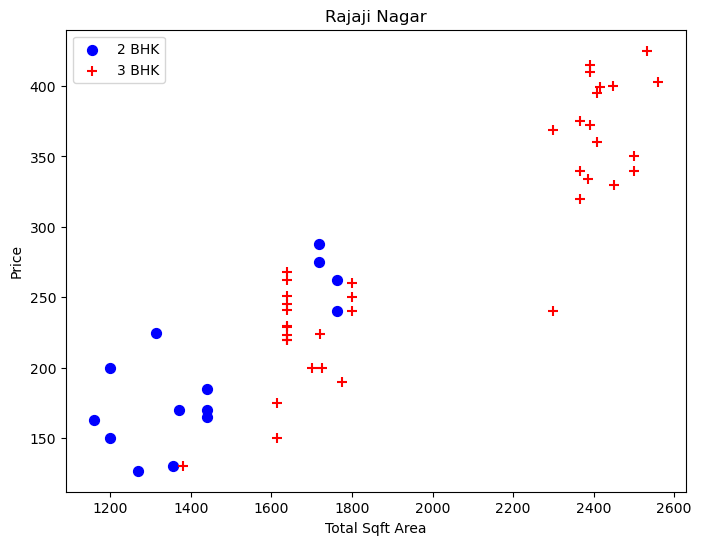

In [41]:
def scatter_plot(df, location):
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]
    plt.figure(figsize=(8,6))
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', marker = 'o', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'red', label = '3 BHK', marker = '+', s = 50)
    plt.xlabel('Total Sqft Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

scatter_plot(df6, 'Rajaji Nagar')

In [42]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exclude_indices, axis = 'index')

df7 = remove_bhk_outliers(df6)

In [43]:
df7.shape

(7329, 7)

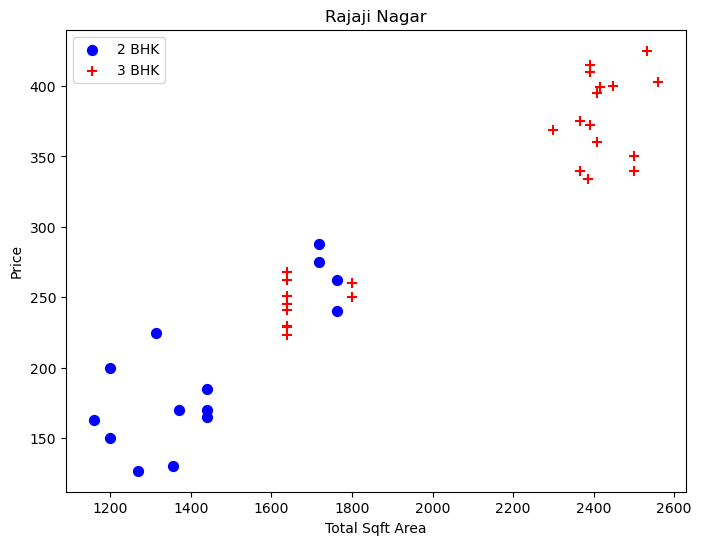

In [44]:
scatter_plot(df7,'Rajaji Nagar')

Text(0, 0.5, 'Count')

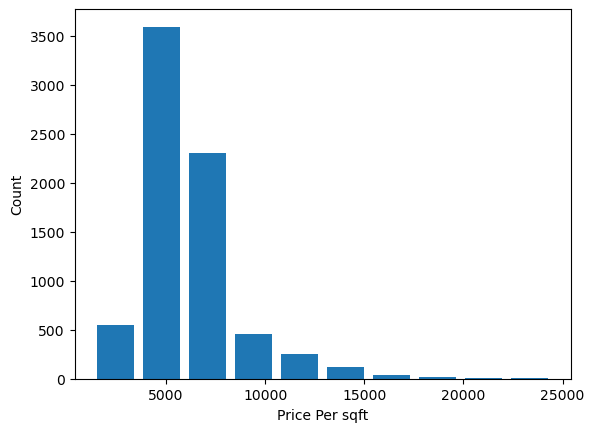

In [45]:
plt.hist(df7.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per sqft")
plt.ylabel("Count")

In [46]:
df7.bath.unique()

array([ 4,  3,  2,  5,  8,  1,  6,  7,  9, 12, 16, 13])

In [47]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13,275.0,13,5069.124424


Text(0, 0.5, 'Count')

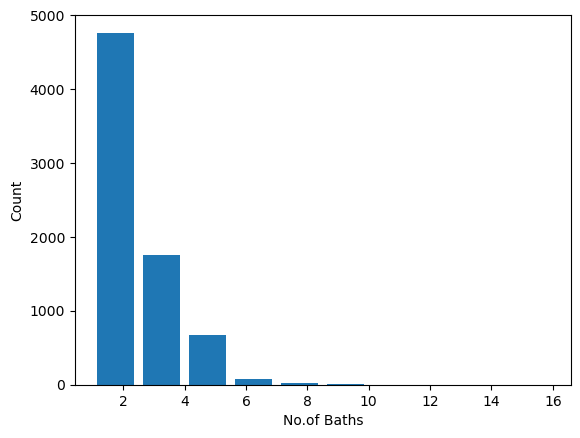

In [48]:
plt.hist(df7.bath, rwidth = 0.8)
plt.xlabel('No.of Baths')
plt.ylabel('Count')

In [49]:
df7[df7['bath']> df7['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9,1000.0,6,8819.897689


In [50]:
df8 = df7[df7['bath']<df7['bhk']+2]
df8.shape

(7251, 7)

In [51]:
df9 = df8.drop(['size', 'price_per_sqft'], axis = 'columns')
df9.head(15)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4,428.0,4
1,1st Block Jayanagar,1630.0,3,194.0,3
2,1st Block Jayanagar,1875.0,2,235.0,3
3,1st Block Jayanagar,1200.0,2,130.0,3
4,1st Block Jayanagar,1235.0,2,148.0,2
5,1st Block Jayanagar,2750.0,4,413.0,4
6,1st Block Jayanagar,2450.0,4,368.0,4
8,1st Phase JP Nagar,1875.0,3,167.0,3
9,1st Phase JP Nagar,1500.0,5,85.0,5
10,1st Phase JP Nagar,2065.0,4,210.0,3


In [52]:
dummies = pd.get_dummies(df9.location, dtype = 'int')
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df10 = pd.concat([df9,dummies.drop('other', axis = 'columns')], axis = 'columns')
df10.head(10)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1500.0,5,85.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2065.0,4,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11 = df10.drop(['location'], axis = 'columns')
df11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
x = df11.drop('price', axis = 'columns')
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y = df11['price']
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [57]:
from sklearn.linear_model import LinearRegression
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8452277697874311

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV


cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)
cross_val_score(LinearRegression(), x,y, cv = cv)

array([0.84522777, 0.80004632, 0.88682995, 0.842265  , 0.86250633])

In [59]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                # 'normalize': [True, False]
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }, 
        'lasso' : {
             'model' : Lasso(),
            'params' : {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
           }
        },    
    }

    scores = []
    cv = ShuffleSplit(n_splits= 5, test_size = 0.2, random_state = 0)
    for algo_names,config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(x,y)
        scores.append({
            'model' : algo_names,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [60]:
find_best_model(x,y)

C:\Users\parth\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\parth\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\parth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\parth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validat

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,decision_tree,0.713847,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,lasso,0.687478,"{'alpha': 2, 'selection': 'random'}"


In [61]:
  def predict_price(location, sqft, bath, bhk):
      loc_index = np.where(x.columns==location)[0][0]
      X = np.zeros(len(x.columns))
      X[0] = sqft
      X[1] = bath
      X[2] = bhk
      if loc_index > 0:
          X[loc_index] = 1

      return lr.predict([X])[0]


In [62]:
predict_price('Vittasandra', 2000,3,4)

C:\Users\parth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


125.84611825878571

In [126]:
predict_price('Indira Nagar', 1000,2,2)

C:\Users\parth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006854

In [128]:
predict_price('Vijayanagar', 1000,2,2)

C:\Users\parth\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


62.297093745808596